## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8460 – Traitement automatique de la langue naturelle <br> </center>
## <center> TP4 INF8460 <br>  Automne 2022 </center>

## 1. DESCRIPTION
Dans ce TP, l’idée est d'utiliser un système de traduction automatique pour générer des requêtes de base de connaissances en SPARQL à partir de questions en langage naturel.

Les bases de connaissances sont une source de données structurées, selon les standards, modèles et langages du Web sémantique, qui permettent un accès efficace à une grande quantité d'information dans des domaines très variés. Cependant, leur accès est limité par la complexité des requêtes qui ne permet pas au public de s'en servir. Un système de traduction automatique pourrait permettre de générer automatiquement une requête étant donnée une question formulée par un usager en langage naturel.

Dans notre cas, la langue d’entrée sera l’anglais et le langage de requête sera SPARQL (https://www.w3.org/TR/sparql11-query/). Afin de faciliter le travail du modèle, nous vous fournissons une version modifiée des questions dans laquelle certains mots sont remplacés par leur équivalent que l’on retrouve dans la requête.

Voici un exemple : <br>

__Question originale :__ _In how many other states do people live, whose languages are spoken in apocalypto?_

__Entrée : Question taggée :__ _In how many other dbp:region do people live, whose dbo:language are spoken in dbr:Apocalypto?_

__Sortie attendue : Requête:__ _select distinct count ( ?uri ) where { dbr:Apocalypto dbo:language ?x . ?x dbp:region ?uri }_

(Cette demande revoie à la partie suivant de la base de connaissance DBPedia:

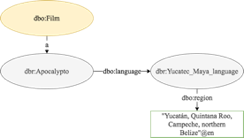

dbr:Apocalypto a dbo:Film . <br>
dbr:Apocalypto dbo:language dbr:Yucatec_Maya_language .  <br>
dbr:Yucatec_Maya_language dbp:region "Yucatán, Quintana Roo, Campeche, northern Belize"@en . )

__Réponse : 1__

### Authors
- Guilhem Garnier 2230323
- Pierre Crochelet 2161844
- Vi Retault 2164296
- Pierre Gallou-Guyot 2227094

## 2. LIBRARIES PERMISES
- Numpy
- Pandas
- HuggingFace
- Keras
- NLTK
- SPACY
- Pytorch
- re


- Pour toute autre librairie, demandez à votre chargé de laboratoire

## 3. INFRASTRUCTURE

- Vous avez accès aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)
- Vous pouvez aussi utiliser l’environnement Google Colab :  https://colab.research.google.com/

## 4. ECHÉANCE

- Fin de la session. La date précise sera indiquée sur Moodle.


## 5. KAGGLE

Le TP4-projet se fera sous forme d’une compétition Kaggle.  Vous devrez utiliser l’environnement Kaggle pour la soumission et l’évaluation de vos modèles.  
Pour tester votre système au fur et à mesure, vous aurez le droit à 4 soumissions par jour sur Kaggle. Vous verrez deux types de résultats sur votre « private leaderboard » et votre « public leaderboard » :
- Le « public leaderboard » est calculé sur approximativement 30% des données de test, choisies aléatoirement par Kaggle. Ce score est public et est calculé sur la même tranche de donnée pour tous les participants.
- Le « private leaderboard » est calculé sur approximativement 70% des données de test et n’est visible qu’à la fin de la compétition. Le résultat final sera basé sur ce leaderboard. Si aucune soumission n’est choisie, la soumission avec le meilleur score sur le « public leaderboard » sera utilisée pour calculer le score sur le « private leaderboard ».

Pour l’évaluation, vous devrez soumettre un fichier de données _tp4_submission.csv_ du même format que le fichier _sample_submission.csv_ (disponible sur le site de la compétition et Moodle). _tp4_submission.csv_ devra contenir pour chaque ligne de votre ensemble de test, la requête retournée par votre approche, selon le format indiqué dans la compétition.



## 6. DESCRIPTION DES DONNEES ET METRIQUES D’EVALUATION

Le corpus est un corpus de 5 000 paires de questions - requêtes sur DBPedia portant sur une grande variété de thèmes plus ou moins spécifiques. Trois documents sont fournis :

-	Les 4000 paires de questions – requêtes d’entrainement dans un fichier train.csv.
-	Les 500 paires de questions – requêtes de validation dans un fichier validation.csv.
-	Les 500 questions de test pour lesquelles vous devez générer des requêtes SPARQL dans un fichier test.csv.

La sortie de votre modèle sera comparée à notre ensemble de référence. Vous serez évalués en utilisant la métrique « accuracy » sur les requêtes prédites par vos modèles dans la compétition Kaggle. Cette métrique vérifie pour chaque requête prédite par votre modèle si elle est exactement égale à la requête attendue. Faite donc bien attention aux requêtes générées : un seul caractère non correct fait compter la requête comme fausse.

Nous vous demandons également de rapporter, dans votre notebook uniquement, la métrique BLEU de votre modèle sur l’ensemble de validation. Cette métrique est très utilisée dans les tâches de traduction automatique et nous vous fournissons une fonction qui la calcule. Pour plus d’information voir https://en.wikipedia.org/wiki/BLEU.

## 7. ETAPES DU TP

A partir de ce notebook squelette, vous devez réaliser les étapes suivantes. (Notez que les cellules dans le squelette sont là à titre informatif il est fort probable que vous rajoutiez des sections au fur et à mesure de votre TP).


### 7.1. Etat de l’art (5%)

Décrivez en __deux paragraphes__, dans une cellule du notebook, avec les références appropriées, les architectures de l’état de l’art pour la génération de requêtes SPARQL. Utilisez le service Google Scholar. Voici quelques mots-clés : Neural Machine Translation SPARQL, SPARQL Sequence to Sequence Model, etc.

En vous basant sur vos recherches et sur cet article, quelles sont les meilleures techniques de l’état de l’art ?  Soyez brefs et clairs. Attention à comparer des approches sur les mêmes jeux de données et en utilisant les mêmes métriques dans votre analyse.



Dans un article de Yin et al. [1] de 2021, 8 variations au total de 3 architectures de réseaux neuronaux ont été testées pour la génération de requêtes SPARQL. Les tests ont été menés sur 5 datasets en considant comme métrique le score BLEU et l'Accuracy. Parmi ces modèles, le modèle à convolution ConvS2S donnait les meilleurs résultats, suivi par par un modèle Transformer. Il est cependant mentionné que tous ces modèles souffrent du même problème: les mots hors vocabulaire (oov words). En effet, de par leur nature, les requêtes SPARQL contiennent souvent de nouveaux mots. Diomedi et al. [2] proposent une première manière de résoudre ce problème à l'aide de "entity linking". Certains mots se voient alors réduits seulement à leur fonction dans la phrase ce qui permet dans certains cas de prendre en compte les mots oov. Par exemple, un mot sera remplacé par la balise <'subj'> puis recopié dans la requête finale.

Dans un article de novembre 2022, Hirigoyen et al. [3] mentionnent également les limites de cette approche à vocabulaire fini. Pour palier cela, Hirigoyen et al. proposent d'implémenter le mécanisme de copie, tel qu'introduit dans CopyNet par Gu et al. [4] à une architecture encodeur-decodeur en l'insérant juste après le décodeur. Ce mécanisme de copie utilise les mots clés présent dans la question pour aider à la génération des requêtes. Les auteur·rices comparent leurs résultats à l'approche utilisée par Yin et al. et obtiennent de bien meilleurs résultats en utilisant les métriques BLEU et accuracy. Cette méthode semble être l'état de l'art pour un modèle de génération de requête SPARQL sans pré-entrainement.

[1] : Yin, X., Gromann, D., & Rudolph, S. (2021). Neural machine translating from natural language to SPARQL. Future Generation Computer Systems, 117, 510-519. </br>
[2] : Diomedi, D., and A. Hogan. 2021. Question Answering over Knowl-edge  Graphs  with  Neural  Machine  Translation  and  Entity  Linking.arXiv:2107.02865 [cs.AI]. </br>
[3] : Hirigoyen, R., Zouaq, A., & Reyd, S. (2022). A Copy Mechanism for Handling Knowledge Base Elements in SPARQL Neural Machine Translation. arXiv preprint arXiv:2211.10271. </br>
[4] : Gu, J., Lu, Z., Li, H., & Li, V. O. (2016). Incorporating copying mechanism in sequence-to-sequence learning. arXiv preprint arXiv:1603.06393.

### 7.2. Méthodologie
#### 7.2.1. Architecture proposée (5%)

Proposez une architecture d'encodeur-décodeur non pré-entrainée de type Transformer ou CNN pour la tâche. Décrivez l’architecture et la méthodologie en quelques lignes dans une cellule de texte.

Pour la tâche, on propose d’utiliser une architecture de type Transformer. Cette architecture combine un encodeur et un décodeur qui sont des piles de même taille (ici, 6) de couches identiques sans partage des poids. Ces couches sont formées de 3 couches d’attention multi-têtes détaillées ci-dessous, d’une couche d’attention croisée (pour le décodeur uniquement) et d’un réseau à propagation avant dense à 1 couche cachée. Aussi, la sortie de chaque couche est normalisée avant d'être passée à la couche suivant. Au sommet de la pile de décodeurs, une tête de classification (classificateur neuronal composé d’une couche linéaire suivie d’un softmax) permet de retourner un mot du vocabulaire de sortie.

La pile d’encodeurs reçoit en entrée une représentation de la séquence d'entrée (en anglais dans ce cas) sous forme de plongements lexicaux (embeddings) auxquels on a sommé des « plongements de position » (positional embeddings) permettant de retrouver une notion de distance entre les mots de la séquence. Pour chaque couche d'encodeur, il y a ensuite une couche de self-attention globale avec un masque permettant de différencer les mots du padding et enfin le réseau à propagation avant. La sortie de la pile d’encodeurs est une représentation de toute la séquence d’entrée.

La pile de décodeurs reçoit en entrée une représentation de la séquence de sortie (en sparql dans ce cas) sous forme de plongement lexicaux (embeddings) auxquels on a sommé des « plongements de position » (positional embeddings) permettant de retrouver une notion de distance entre les mots de la séquence. Pour chaque couche décodeur, il y a ensuite la couche de self-attention masquée. Le masque ici assure que la sortie pour l'élément d'une séquence ne dépend que des éléments précédents. Puis on retrouve le module d’attention croisée avec la sortie du module d'encodeur avant le réseau à propagation avant. Finalement, une fois ces opérations faites pour chaque couche décodeur, la sortie du dernier décodeur passe dans un réseau linéaire puis un l'application d'un softmax permet de diriger le décodeur vers la génération du « meilleur » token, à partir de début de la phrase et de la représentation de toute la séquence d’entrée de l’encodeur, qui est ce que l’on souhaite traduire avec cette architecture.

Au cours de l’entraînement, nous fournissons des paires de requêtes en langue naturelle prétraitées (suppression des espaces/tabulations, ajout de \<S> au début et de \</S> à la fin et padding pour atteindre une longueur de 5000 par défaut pour toutes les requêtes d'un même batch) qu’on donne en entrée de l’encodeur, et les requêtes SPARQL correspondantes (qui sont la sortie attendue du décodeur). Nous entraînons le modèle sur 200 epochs avec une taille de batch de 200, en diminuant la cross-entropy loss entre les tokens générés par le décodeur et les tokens attendus dans l’exemple.

#### 7.2.2. Mise en place (45%)

Mettez en place la solution proposée dans la partie précédente.

Le code qui suit est inspiré de [The annotated transformer](https://nlp.seas.harvard.edu/annotated-transformer/).

In [ ]:
import torch
import torch.nn as nn
from torch.nn.functional import log_softmax
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import TensorDataset, DataLoader, Dataset
import copy
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
import math
from typing import List, Tuple

class Transformer(nn.Module):
    """An transformer as encoder decoder pair"""
    def __init__(self, src_vocab, tgt_vocab, N, d_model, d_ff, h, dropout, maxlen=5000):
        super(Transformer, self).__init__()
        self.src_embeddings = Embeddings(d_model, src_vocab)
        self.tgt_embeddings = Embeddings(d_model, tgt_vocab)
        self.positionalEncoding = PositionalEncoding(d_model, dropout, maxlen)
        self.encoder = Encoder(EncoderLayer(h, d_model, d_ff, dropout), N)
        self.decoder = Decoder(DecoderLayer(h, d_model, d_ff, dropout), N)
        self.proj = nn.Linear(d_model, tgt_vocab)
        self.generator = Generator(d_model, tgt_vocab)
        self.d_model = d_model

    def forward(self, src, tgt, src_mask, tgt_mask):
        x = self.encode(src, src_mask)
        x = self.decode(x, src_mask, tgt, tgt_mask)
        x = self.generator(x)
        return x

    def encode(self, src, src_mask):
        """Apply transformer's encoders with source embedding and positional encoding"""
        x = self.src_embeddings(src)
        x = self.positionalEncoding(x)
        x = self.encoder(x, src_mask)
        return x

    def decode(self, memory, src_mask, tgt, tgt_mask):
        """Apply transformer's encoders with target embedding and positional encoding"""
        x = self.tgt_embeddings(tgt)
        x = self.positionalEncoding(x)
        x = self.decoder(x, memory, src_mask, tgt_mask)
        return x

class Generator(nn.Module):
    """Simple linear layer with log softmax"""
    def __init__(self, d_model, tgt_vocab):
        super(Generator, self).__init__()
        self.proj = nn.Linear(d_model, tgt_vocab)

    def forward(self, x):
        return log_softmax(self.proj(x), dim=-1)

class Encoder(nn.Module):
    """A encoder is a stack of N identical layers"""
    def __init__(self, layer, N):
        super(Encoder, self).__init__()
        self.layers = nn.ModuleList([copy.deepcopy(layer) for _ in range(N)])
        self.norm = LayerNorm(layer.size)

    def forward(self, x, src_mask):
        for layer in self.layers:
            x = layer(x, src_mask)
        return self.norm(x)

class Decoder(nn.Module):
    """A decoder is a stack of N identical layer with memory of the encoder output"""
    def __init__(self, layer, N):
        super(Decoder, self).__init__()
        self.layers = nn.ModuleList([copy.deepcopy(layer) for _ in range(N)])
        self.norm = LayerNorm(layer.size)

    def forward(self, x, memory, src_mask, tgt_mask):
        for layer in self.layers:
            x = layer(x, memory, src_mask, tgt_mask)
        return self.norm(x)

class EncoderLayer(nn.Module):
    """Each encoder layer is self attention and feed forward"""

    def __init__(self, h, d_model, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attention = MultiHeadedAttention(h, d_model, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)
        self.dropout = nn.Dropout(dropout)
        self.norm1 = LayerNorm(d_model)
        self.norm2 = LayerNorm(d_model)
        self.size = d_model

    def forward(self, x, src_mask):
        # Add and norm self attention
        x = x + self.norm1(self.dropout(self.self_attention(x, x, x, src_mask)))
        # Add and norm feed forward
        x = x + self.norm2(self.dropout(self.feed_forward(x)))
        return x

class DecoderLayer(nn.Module):
    """Each decoder layer is self attention, cross attention and feed forward"""

    def __init__(self, h, d_model, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attention = MultiHeadedAttention(h, d_model, dropout)
        self.cross_attention = MultiHeadedAttention(h, d_model, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)
        self.dropout = nn.Dropout(dropout)
        self.norm1 = LayerNorm(d_model)
        self.norm2 = LayerNorm(d_model)
        self.norm3 = LayerNorm(d_model)
        self.size = d_model

    def forward(self, x, memory, src_mask, tgt_mask):
        # Add and norm masked self attention
        x = x + self.norm1(self.dropout(self.self_attention(x, x, x, tgt_mask)))
        # Add and norm cross attention
        x = x + self.norm2(self.dropout(self.cross_attention(x, memory, memory, src_mask)))
        # Add and norm feed forward
        x = x + self.norm3(self.dropout(self.feed_forward(x)))
        return x

class FeedForward(nn.Module):
    """Fully connected feed forward network"""

    def __init__(self, d_model, d_ff, dropout):
        super(FeedForward, self).__init__()
        self.layer1 = nn.Linear(d_model, d_ff)
        self.layer2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.layer2(self.dropout(self.layer1(x).relu()))

def attention(query, key, value, mask=None, dropout=None):
    """Compute attention"""
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1))/math.sqrt(d_k)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
    attn_coeffs = scores.softmax(dim=-1)
    if dropout is not None:
        attn_coeffs = dropout(attn_coeffs)

    return torch.matmul(attn_coeffs, value), attn_coeffs


class MultiHeadedAttention(nn.Module):
    def __init__(self, h, d_model, dropout=0.1):
        super(MultiHeadedAttention, self).__init__()
        assert d_model % h == 0

        self.d_k = d_model // h
        self.h = h
        self.linearV = nn.Linear(d_model, d_model)
        self.linearK = nn.Linear(d_model, d_model)
        self.linearQ = nn.Linear(d_model, d_model)
        self.linearOutput = nn.Linear(d_model, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, query, key, value, mask=None):
        if mask is not None:
            # Apply mask to all heads
            mask = mask.unsqueeze(1)
        nbatches = query.size(0)

        # Linear projections and split into multiple heads
        query = self.linearQ(query).view(nbatches, -1, self.h, self.d_k).transpose(1,2)
        key = self.linearK(key).view(nbatches, -1, self.h, self.d_k).transpose(1,2)
        value = self.linearV(value).view(nbatches, -1, self.h, self.d_k).transpose(1,2)

        # Apply Attention
        x, attn_coeffs = attention(query, key, value, mask=mask, dropout=self.dropout)

        # Concat back into a single attention matrix
        x = x.transpose(1,2).reshape(nbatches, -1, self.h*self.d_k)

        # Apply final linear
        x = self.linearOutput(x)
        return x

class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
        super(Embeddings, self).__init__()
        self.embedding = nn.Embedding(vocab, d_model)
        self.d_model = d_model

    def forward(self, x):
        return self.embedding(x) * math.sqrt(self.d_model)

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000)/d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)

        # Not a model p/arameter but needs to be on the same device as model parameters
        self.register_buffer("pe", pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)].requires_grad_(False)
        return self.dropout(x)

class LayerNorm(nn.Module):
    "Construct a layernorm module (See citation for details)."

    def __init__(self, features, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(features))
        self.b_2 = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.a_2 * (x - mean) / (std + self.eps) + self.b_2

def subsequent_mask(size):
    """Mask subsequent positions"""
    attn_shape = (1, size, size)
    subsequent_mask = torch.triu(torch.ones(attn_shape), diagonal=1).type(torch.uint8)
    return subsequent_mask == 0

def make_std_mask(tgt, pad):
    "Create a mask to hide padding and future words."
    tgt_mask = (tgt != pad).unsqueeze(-2)
    tgt_mask = tgt_mask & subsequent_mask(tgt.size(-1)).type_as(tgt_mask.data)
    return tgt_mask

def rate(step, model_size, factor, warmup):
    """Learning rate schedule"""
    if step == 0:
        step = 1
    return factor*(model_size**(-0.5)*min(step**(-0.5), step*warmup**(-1.5)))

def make_model(src_vocab, tgt_vocab, N=5, d_model=512, d_ff=2048, h=8, dropout=0.1):
    model = Transformer(src_vocab, tgt_vocab, N, d_model, d_ff, h, dropout)
    # Initialize model parameters with uniform weights
    for p in model.parameters():
        if p.dim() > 1:
            nn.init.xavier_uniform_(p)
    return model.to(device)

In [ ]:
def inference_test():
    test_model = make_model(11, 11, 2)
    test_model.eval()
    src = torch.LongTensor([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]).to(device)
    src_mask = torch.ones(1, 1, 10).to(device)

    memory = test_model.encode(src, src_mask)
    ys = torch.zeros(1, 1).type_as(src).to(device)

    for i in range(9):
        out = test_model.decode(
            memory, src_mask, ys, subsequent_mask(ys.size(1)).type_as(src.data)
        )
        prob = test_model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.data[0]
        ys = torch.cat(
            [ys, torch.empty(1, 1).type_as(src.data).fill_(next_word)], dim=1
        )

    print("Example Untrained Model Prediction:", ys)


for _ in range(10):
    inference_test()



Example Untrained Model Prediction: tensor([[ 0, 10,  4, 10,  4,  1,  4, 10,  4, 10]], device='cuda:0')
Example Untrained Model Prediction: tensor([[0, 6, 6, 6, 6, 6, 6, 6, 6, 6]], device='cuda:0')
Example Untrained Model Prediction: tensor([[0, 9, 9, 4, 9, 9, 9, 9, 9, 9]], device='cuda:0')
Example Untrained Model Prediction: tensor([[0, 1, 6, 6, 6, 6, 1, 6, 6, 6]], device='cuda:0')
Example Untrained Model Prediction: tensor([[ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0]], device='cuda:0')
Example Untrained Model Prediction: tensor([[0, 4, 3, 3, 3, 3, 3, 3, 2, 2]], device='cuda:0')
Example Untrained Model Prediction: tensor([[0, 6, 6, 6, 6, 6, 6, 6, 6, 6]], device='cuda:0')
Example Untrained Model Prediction: tensor([[0, 1, 6, 9, 9, 9, 9, 9, 9, 9]], device='cuda:0')
Example Untrained Model Prediction: tensor([[ 0, 10, 10, 10, 10, 10, 10, 10, 10, 10]], device='cuda:0')
Example Untrained Model Prediction: tensor([[ 0,  6,  4,  2, 10,  9,  2,  9,  2,  9]], device='cuda:0')


In [ ]:
def data_gen(V, batch_size, nbatches):
    data_size = batch_size*nbatches
    pad = 0
    data = torch.randint(1, V, size=(data_size, 10))
    data[:, 0] = 1
    src = data
    src_mask = (src != pad).unsqueeze(-2)
    tgt = data[:,:-1]
    tgt_y = data[:,1:]
    tgt_mask = make_std_mask(tgt, pad)
    dataset = TensorDataset(src, tgt, tgt_y, src_mask, tgt_mask)
    return DataLoader(dataset, batch_size=batch_size, pin_memory=True)

def greedy_decode(model, src, src_mask, max_len, start_symbol, end_symbol=None):
    memory = model.encode(src, src_mask)
    ys = torch.zeros(1, 1).fill_(start_symbol).type_as(src.data).to(device)
    for _ in range(max_len - 1):
        out = model.decode(
            memory, src_mask, ys, subsequent_mask(ys.size(1)).type_as(src.data)
        )
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.data[0]
        ys = torch.cat(
            [ys, torch.zeros(1, 1).type_as(src.data).fill_(next_word)], dim=1
        )
        if next_word==end_symbol:
            break
    return ys

def train_simple_task():
    V = 11
    train = data_gen(V, 80, 20)
    validation = data_gen(V, 80, 5)

    model = make_model(V, V, N=2)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.5, betas=(0.9, 0.98), eps=1e-9)
    scheduler = LambdaLR(optimizer=optimizer, lr_lambda=lambda step: rate(step, model_size=model.d_model, factor=1.0, warmup=400))
    loss_function = nn.CrossEntropyLoss(ignore_index=0, label_smoothing=0)

    train_loss = []
    validation_loss = []

    for epoch in tqdm(range(20), desc="epoch"):
        # Run epoch train
        model.train()
        for i, batch in enumerate(train):
            optimizer.zero_grad()

            src, tgt, tgt_y, src_mask, tgt_mask = [a.to(device) for a in batch]
            out = model.forward(src, tgt, src_mask, tgt_mask).view(-1,V)
            tgt_y = tgt_y.view(-1)
            loss = loss_function(out, tgt_y)
            train_loss.append(loss.item())

            loss.backward()
            optimizer.step()
            scheduler.step()
        # Run epoch eval
        model.eval()
        for i, batch in enumerate(validation):
            src, tgt, tgt_y, src_mask, tgt_mask = [a.to(device) for a in batch]
            out = model.forward(src, tgt, src_mask, tgt_mask).view(-1, V)
            tgt_y = tgt_y.view(-1)
            loss = loss_function(out, tgt_y)
            validation_loss.append(loss.item())

    model.eval()
    src = torch.LongTensor([[0,1,2,3,4,5,6,7,8,9]]).to(device)
    max_len = src.shape[1]
    src_mask = torch.ones(1, 1, max_len).to(device)
    ys = greedy_decode(model, src, src_mask, max_len=max_len, start_symbol=0)
    print(ys)
    return torch.equal(ys,torch.tensor([[0,1,2,3,4,5,6,7,8,9]]).to(device))

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.lm import Vocabulary
from torch.nn.utils.rnn import pad_sequence

padding_id = 0
tokenizer = RegexpTokenizer('\s+', gaps=True)

class Vocab(Vocabulary):
    def __init__(self, tokens, unk_cutoff=1):
        super().__init__(np.insert(np.concatenate(tokens.tolist()), 0, ["<BLANK>"]), unk_cutoff=unk_cutoff)
        self.word_to_id_dict = {word:i for i,word in enumerate(self)}
        self.id_to_word_dict = {i:word for i,word in enumerate(self)}

    def word_to_id(self, words):
        if type(words) is list or type(words) is Tuple or type(words) is np.ndarray:
            return [self.word_to_id_dict[a] for a in self.lookup(words)]
        return self.word_to_id_dict[self.lookup(words)]

    def id_to_word(self, ids):
        if type(ids) is list or type(ids) is Tuple or type(words) is np.ndarray:
            return [self.id_to_word_dict[a] for a in ids]
        return self.id_to_word_dict[ids]

def tokenize(df):
    tokens = pd.DataFrame()
    for column in df.columns:
        tokens[column] = df[column].apply(tokenizer.tokenize).apply(np.insert, args=(0, "<S>")).apply(np.append, args=["</S>"])
    return tokens

def vectorize(tokens, vocab):
    return tokens.apply(vocab.word_to_id).apply(torch.tensor)

train_df = pd.read_csv("data/train.csv", index_col=0)
validation_df = pd.read_csv("data/validation.csv", index_col=0)
test_df = pd.read_csv("data/test.csv", index_col=0)

train_tokens = tokenize(train_df)
validation_tokens = tokenize(validation_df)
test_tokens = tokenize(test_df)

maxlen = max(train_tokens["sparql"].apply(len))+10

english_vocab = Vocab(train_tokens["english"])
sparql_vocab = Vocab(train_tokens["sparql"])

train_english_tensors = vectorize(train_tokens["english"], english_vocab)
train_sparql_tensors = vectorize(train_tokens["sparql"], sparql_vocab)
validation_english_tensors = vectorize(validation_tokens["english"], english_vocab)
validation_sparql_tensors = vectorize(validation_tokens["sparql"], sparql_vocab)
test_english_tensors = vectorize(test_tokens["english"], english_vocab)

In [ ]:
## Hyper paramètres
batch_size = 200
validation_batch_size = 200
nb_epoch = 200
N = 6
lr = 0.1
betas = (0.9, 0.98)
eps = 1e-9
factor = 1.0
warmup = 400
label_smoothing = 0.1

In [ ]:
def collate_batch(batch):
  """Pad batch value with zeros"""
  src = [a["src"] for a in batch]
  tgt = [a["tgt"] for a in batch]
  src = pad_sequence(src, batch_first=True, padding_value=padding_id)
  tgt = pad_sequence(tgt, batch_first=True, padding_value=padding_id)

  src_mask = (src != padding_id).unsqueeze(-2)
  tgt, tgt_y = tgt[:,:-1], tgt[:,1:]
  tgt_mask = make_std_mask(tgt, padding_id)

  return src, tgt, tgt_y, src_mask, tgt_mask

class TranslateDataset(Dataset):
  def __init__(self, src, tgt):
    super().__init__()
    assert len(src) == len(src)
    self.src = src
    self.tgt = tgt
    self.len = len(src)

  def __len__(self):
    return self.len

  def __getitem__(self, idx):
    return {"src":self.src[idx], "tgt": self.tgt[idx]}

def prepare_data(src, tgt, batch_size):
  dataset = TranslateDataset(src, tgt)
  return DataLoader(dataset, collate_fn=collate_batch, batch_size=batch_size, pin_memory=True)

train = prepare_data(train_english_tensors, train_sparql_tensors, batch_size)
validation = prepare_data(validation_english_tensors, validation_sparql_tensors, validation_batch_size)
src_vocab = english_vocab
tgt_vocab = sparql_vocab

In [ ]:
model = make_model(len(src_vocab), len(tgt_vocab), N=N)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, betas=betas, eps=eps)
scheduler = LambdaLR(optimizer=optimizer, lr_lambda=lambda step: rate(step, model_size=model.d_model, factor=factor, warmup=warmup))
loss_function = nn.CrossEntropyLoss(ignore_index=padding_id, label_smoothing=label_smoothing)

train_loss = []
validation_loss = []

best_model = copy.deepcopy(model)
best_validation_loss = None

for epoch in tqdm(range(nb_epoch)):
    # Run epoch train
    model.train()
    loss_list = []
    for i, batch in enumerate(train):
        optimizer.zero_grad()

        src, tgt, tgt_y, src_mask, tgt_mask = [a.to(device) for a in batch]
        out = model.forward(src, tgt, src_mask, tgt_mask)
        tgt_y = tgt_y.view(-1)
        loss = loss_function(out.view(-1, out.size(-1)), tgt_y.view(-1))
        loss_list.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()
    train_loss.append(np.mean(loss_list))
    # Run epoch eval
    model.eval()
    loss_list = []
    for i, batch in enumerate(validation):
        src, tgt, tgt_y, src_mask, tgt_mask = [a.to(device) for a in batch]
        out = model.forward(src, tgt, src_mask, tgt_mask)
        loss = loss_function(out.view(-1, out.size(-1)), tgt_y.view(-1))
        loss_list.append(loss.item())
    validation_loss.append(np.mean(loss_list))
    if best_validation_loss is None or validation_loss[-1] < best_validation_loss:
        best_validation_loss = validation_loss[-1]
        best_model = copy.deepcopy(model)
    print(f"EPOCH {epoch} train_loss={train_loss[-1]} validation_loss={validation_loss[-1]}")

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH 0 train_loss=7.893208575248718 validation_loss=6.854603131612142
EPOCH 1 train_loss=6.546305370330811 validation_loss=5.9097358385721845
EPOCH 2 train_loss=5.781983661651611 validation_loss=5.085222085316976
EPOCH 3 train_loss=4.818444418907165 validation_loss=3.920821189880371
EPOCH 4 train_loss=3.8556293129920958 validation_loss=3.458643118540446
EPOCH 5 train_loss=3.4083587169647216 validation_loss=3.193674166997274
EPOCH 6 train_loss=3.163816225528717 validation_loss=3.0346078077952066
EPOCH 7 train_loss=2.985628771781921 validation_loss=2.8895210425059
EPOCH 8 train_loss=2.8424524068832397 validation_loss=2.7729955514272056
EPOCH 9 train_loss=2.7327893018722533 validation_loss=2.7007784843444824
EPOCH 10 train_loss=2.6472271919250487 validation_loss=2.653914133707682
EPOCH 11 train_loss=2.5846450567245483 validation_loss=2.614093065261841
EPOCH 12 train_loss=2.532915508747101 validation_loss=2.582436720530192
EPOCH 13 train_loss=2.487732398509979 validation_loss=2.5615214506

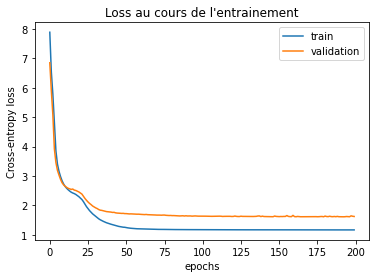

In [ ]:
# Plot validation and training loss
ep = np.arange(0, nb_epoch)
plt.plot(ep, train_loss, '-', label='train')
plt.plot(ep, validation_loss, '-', label='validation')
plt.legend()
plt.title("Loss au cours de l'entrainement")
plt.xlabel("epochs")
plt.ylabel("Cross-entropy loss")
plt.show()

In [ ]:
chosen_example = 11
model.eval()
print(f"Test input is:")
src = validation_english_tensors[chosen_example].unsqueeze(0)
print(english_vocab.id_to_word(src.squeeze().tolist()))
src_mask = (src!=0).unsqueeze(-2)
tgt = validation_tokens["sparql"][chosen_example]
print(f"Expected output of length {tgt.size} is:")
print(" ".join(tgt.tolist()))
src = src.requires_grad_(False).clone().detach().to(device=device)
src_mask = src_mask.requires_grad_(False).clone().detach().to(device=device)
output = greedy_decode(model, src, src_mask, max_len=50, start_symbol=sparql_vocab.word_to_id("<S>"), end_symbol=sparql_vocab.word_to_id("</S>")).squeeze()
print(f"Actual output of length {output.shape[0]} is: ")
print(output)
print(" ".join(sparql_vocab.id_to_word(output.tolist())))


Test input is:
['<S>', 'what', 'is', 'the', 'dbo:routeEnd', 'of', 'dbr:Birmingham_and_Oxford_Junction_Railway', '?', '</S>']
Expected output of length 11 is:
<S> select distinct ?uri where { dbr:Birmingham_and_Oxford_Junction_Railway dbo:routeEnd ?uri } </S>
Actual output of length 11 is: 
tensor([   1,    2,    3,    6,    8,    9, 3950,  181,    6,   13,   14],
       device='cuda:0')
<S> select distinct ?uri where { dbr:Birmingham_and_Oxford_Junction_Railway dbo:routeEnd ?uri } </S>


In [ ]:
count_unknown=0
for tensor in validation_english_tensors:
    if "<UNK>" in english_vocab.id_to_word(tensor.tolist()):
        count_unknown+=1
print("Max performance without dealing with <UNK>", 1-count_unknown/len(validation_english_tensors))

Max performance without dealing with <UNK> 0.41600000000000004


#### 7.4.3. Évaluation (10%)

Afficher les résultats de votre modèle sur l’ensemble de validation au moyen de la métrique de précision globale et de la métrique BLEU,.

Générez, le fichier _tp4_submission.csv_ qui contient les questions de test et leurs requêtes SPARQL.


In [ ]:
from torchtext.data.metrics import bleu_score
def compute_bleu(predictions: List[List[str]], targets: List[List[str]]) -> float:
    """
    entrées:
       - predictions: Liste des prédicitons du modèle pour l'ensemble de validation. Chaque prédiction est une liste de jetons textuels.
       - targets: Liste des requêtes attendues de l'ensemble de validation. Chaque requête est une liste de jetons textuels.
    sortie:
       Le score bleu moyen de vos prédictions comparées aux requêtes attendues.
    """
    return bleu_score(predictions, [[tokens] for tokens in targets])

def compute_accuracy(predictions, targets):
   return (sum(np.array(predictions, dtype=object)==np.array(targets, dtype=object)))/len(predictions)

In [ ]:
maxlen = max(train_sparql_tensors.apply(len))+10
predictions = []
targets = []
for i in tqdm(range(0, len(validation_english_tensors))):
    src = validation_english_tensors[i].unsqueeze(0)
    src_mask = (src!=0).unsqueeze(-2)
    src = src.requires_grad_(False).clone().detach().to(device)
    src_mask = src_mask.requires_grad_(False).clone().detach().to(device)
    output = greedy_decode(model, src, src_mask, max_len=maxlen, start_symbol=sparql_vocab.word_to_id("<S>"), end_symbol=sparql_vocab.word_to_id("</S>")).squeeze()
    predictions.append(sparql_vocab.id_to_word(output.tolist()))
    targets.append(validation_tokens["sparql"][i].tolist())
print("BLEU score", compute_bleu(predictions, targets))
print("Accuracy", compute_accuracy(predictions, targets))

  0%|          | 0/500 [00:00<?, ?it/s]

BLEU score 0.8434478030976812
Accuracy 0.294


### 7.3. Approche(s) avancée(s) (30%)
Reprenez les étapes de la partie précédente avec une ou plusieurs nouvelle(s) architecture(s) plus complexe(s), ou améliorant votre précédente architecture, afin d’obtenir un score plus élevé sur l’ensemble de validation et dans la compétition Kaggle. Démontrez bien cette amélioration dans votre notebook.

Le modèle précédent, bien qu'il ait un score pour la métrique BLEU élevé sur notre ensemble de validation, perd en efficacité lorsqu'il doit utiliser des mots hors vocabulaires (OOV), ce qui arrive lorsque le modèle doit utiliser des éléments qui n'ont pas été rencontrés dans l'ensemble d'entraînement. Le greedy decoding va à la place remplacer les jetons inconnus par des jetons du vocabulaire d'entraînement les plus probables étant données le contexte. </br>
De plus, la métrique BLEU utilisée nous indique juste que les requêtes générées par le modèle ont une forme correcte, sans inspecter son sens. Il est donc possible d'obtenir une valeur BLEU élevée même si aucune phrase n'est correcte: cela explique pourquoi l'accuracy est plus faible. Nous pouvons également remarquer ceci sur le chosen_example quelques cellules plus haut : la syntaxe de la requête générée est correcte (selection d'un attribut du RDF satisfaisant 2 contraintes), mais les contraintes ne correspondent pas à ce qui est attendu (dbr:Bordesley_railway_station dbp:borough vs dbr:Birmingham_and_Oxford_Junction_Railway dbo:routeEnd normalement), sûrement car le gold standard dbr:Birmingham_and_Oxford_Junction_Railway dbo:routeEnd n'a pas été rencontré dans l'ensemble d'entraînement et donc n'appartient pas au vocabulaire. </br>
Pour résoudre ce problème, Hirigoyen et al. [3] proposent d'utiliser le mécanisme de copie : l'idée est de masquer les tokens inconnus de la requête avant de la passer en entrée de l'encodeur, ceci afin de produire en sortie une requête SPARQL "générique" syntaxiquement correcte, et de copier directement les tokens à partir de la requête initiale en langue naturelle dans la requête SPARQL. Ceci permet de contourner le problème des OOV et ainsi de ne pas avoir à augmenter inutilement la taille du vocabulaire utilisé dans l'entraînement. </br>
Pour ce faire, on modifie légèrement la manière dont les vocabulaires sont construits. On va dans un premier temps construire les vocabulaires en enlevant tous les mots spécifiques à sparql. Ces mots sont tous ceux qui commencent par l'un de ces préfixes: *dbo:, dbr:, dbc:, dbp:, dct:, geo:, georss:*. Ensuite, on va compléter avec des mots aléatoires vocabulaire le plus petit et rajouter tous les mots spécifiques à sparql à la fin des vocabulaires. Comme on veut juste copier les jetons, ils est important que la correspondance id-jeton soit la même dans les deux vocabulaires pour les mots spécifiques à sparql, c'est pourquoi on remplit l'un d'eux avec des mots aléatoires.

In [ ]:
import torch
import torch.nn as nn
from torch.nn.functional import log_softmax
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import TensorDataset, DataLoader, Dataset
import copy
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import math
from typing import List, Tuple

class Transformer(nn.Module):
    """An transformer as encoder decoder pair"""
    def __init__(self, src_vocab, tgt_vocab, N, d_model, d_ff, h, dropout, maxlen=5000):
        super(Transformer, self).__init__()
        self.src_embeddings = Embeddings(d_model, src_vocab)
        self.tgt_embeddings = Embeddings(d_model, tgt_vocab)
        self.positionalEncoding = PositionalEncoding(d_model, dropout, maxlen)
        self.encoder = Encoder(EncoderLayer(h, d_model, d_ff, dropout), N)
        self.decoder = Decoder(DecoderLayer(h, d_model, d_ff, dropout), N)
        self.proj = nn.Linear(tgt_vocab, 1)
        self.generator = Generator(d_model, tgt_vocab)
        self.d_model = d_model
        self.input_vocab_size = src_vocab
        self.output_vocab_size = tgt_vocab

    def forward(self, src, tgt, src_mask, tgt_mask):
        x = self.encode(src.masked_fill(src >= self.input_vocab_size, 0), src_mask)
        x, attention = self.decode(x, src_mask, tgt.masked_fill(tgt >= self.output_vocab_size, 0), tgt_mask)
        x = self.generator(x)

        # Calculate alpha bal with formula from Hirigoyen et al.
        alpha_bal = torch.sigmoid(self.proj(x))
        # To calculate p_gen, we need to extand the vector x to contain the KB words present in the query
        max_oov_word = torch.max(src) + 1
        # Those KB words originaly have a probability of 0
        new_x = torch.autograd.Variable(torch.zeros((x.shape[0], x.shape[1], max_oov_word))).to(device=device)
        # Simply recopy x into this new vector
        new_x[0:x.shape[0], 0:x.shape[1], 0:x.shape[2]] = x
        x = new_x
        # p_gen is the softmax of probability vector, balanced by alpha_bal
        p_gen = (1-alpha_bal) * torch.nn.functional.softmax(x, dim=2)
        # p_copy is just the attention scores, balanced by alpha_bal
        p_copy = alpha_bal * attention[:, 3]

        # Compute indexes of where p_copy needs to be added to p_gen
        index = torch.zeros(src.shape[0], x.shape[1], src.shape[1], dtype=torch.int64).to(device)
        for i in range(src.shape[0]):
          index[i] = src[i].repeat(index.shape[1], 1)

        # In the end the probability vector is just the sum of p_gen and p_copy at the needed indexes
        x = p_gen.scatter_add(2, index, p_copy)
        return torch.log(x)

    def encode(self, src, src_mask):
        """Apply transformer's encoders with source embedding and positional encoding"""
        x = self.src_embeddings(src)
        x = self.positionalEncoding(x)
        x = self.encoder(x, src_mask)
        return x

    def decode(self, memory, src_mask, tgt, tgt_mask):
        """Apply transformer's encoders with target embedding and positional encoding"""
        x = self.tgt_embeddings(tgt)
        x = self.positionalEncoding(x)
        x, attention = self.decoder(x, memory, src_mask, tgt_mask)
        return x, attention

class Generator(nn.Module):
    """Simple linear layer with log softmax"""
    def __init__(self, d_model, tgt_vocab):
        super(Generator, self).__init__()
        self.proj = nn.Linear(d_model, tgt_vocab)

    def forward(self, x):
        # return log_softmax(self.proj(x), dim=-1)
        return self.proj(x)

class Encoder(nn.Module):
    """A encoder is a stack of N identical layers"""
    def __init__(self, layer, N):
        super(Encoder, self).__init__()
        self.layers = nn.ModuleList([copy.deepcopy(layer) for _ in range(N)])
        self.norm = LayerNorm(layer.size)

    def forward(self, x, src_mask):
        for layer in self.layers:
            x = layer(x, src_mask)
        return self.norm(x)

class Decoder(nn.Module):
    """A decoder is a stack of N identical layer with memory of the encoder output"""
    def __init__(self, layer, N):
        super(Decoder, self).__init__()
        self.layers = nn.ModuleList([copy.deepcopy(layer) for _ in range(N)])
        self.norm = LayerNorm(layer.size)

    def forward(self, x, memory, src_mask, tgt_mask):
        for layer in self.layers:
            x, attention = layer(x, memory, src_mask, tgt_mask)
        return self.norm(x), attention

class EncoderLayer(nn.Module):
    """Each encoder layer is self attention and feed forward"""

    def __init__(self, h, d_model, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attention = MultiHeadedAttention(h, d_model, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)
        self.dropout = nn.Dropout(dropout)
        self.norm1 = LayerNorm(d_model)
        self.norm2 = LayerNorm(d_model)
        self.size = d_model

    def forward(self, x, src_mask):
        # Add and norm self attention
        x = x + self.norm1(self.dropout(self.self_attention(x, x, x, src_mask)))
        # Add and norm feed forward
        x = x + self.norm2(self.dropout(self.feed_forward(x)))
        return x

class DecoderLayer(nn.Module):
    """Each decoder layer is self attention, cross attention and feed forward"""

    def __init__(self, h, d_model, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attention = MultiHeadedAttention(h, d_model, dropout)
        self.cross_attention = MultiHeadedAttention(h, d_model, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)
        self.dropout = nn.Dropout(dropout)
        self.norm1 = LayerNorm(d_model)
        self.norm2 = LayerNorm(d_model)
        self.norm3 = LayerNorm(d_model)
        self.size = d_model

    def forward(self, x, memory, src_mask, tgt_mask):
        # Add and norm masked self attention
        x = x + self.norm1(self.dropout(self.self_attention(x, x, x, tgt_mask)))
        # Add and norm cross attention
        t, attention = self.cross_attention(x, memory, memory, src_mask, return_attention=True)
        x = x + self.norm2(self.dropout(t))
        # Add and norm feed forward
        x = x + self.norm3(self.dropout(self.feed_forward(x)))
        return x, attention

class FeedForward(nn.Module):
    """Fully connected feed forward network"""

    def __init__(self, d_model, d_ff, dropout):
        super(FeedForward, self).__init__()
        self.layer1 = nn.Linear(d_model, d_ff)
        self.layer2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.layer2(self.dropout(self.layer1(x).relu()))

def attention(query, key, value, mask=None, dropout=None):
    """Compute attention"""
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1))/math.sqrt(d_k)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
    attn_coeffs = scores.softmax(dim=-1)
    if dropout is not None:
        attn_coeffs = dropout(attn_coeffs)

    return torch.matmul(attn_coeffs, value), attn_coeffs

class MultiHeadedAttention(nn.Module):
    def __init__(self, h, d_model, dropout=0.1):
        super(MultiHeadedAttention, self).__init__()
        assert d_model % h == 0

        self.d_k = d_model // h
        self.h = h
        self.linearV = nn.Linear(d_model, d_model)
        self.linearK = nn.Linear(d_model, d_model)
        self.linearQ = nn.Linear(d_model, d_model)
        self.linearOutput = nn.Linear(d_model, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, query, key, value, mask=None, return_attention = False):
        if mask is not None:
            # Apply mask to all heads
            mask = mask.unsqueeze(1)
        nbatches = query.size(0)

        # Linear projections and split into multiple heads
        query = self.linearQ(query).view(nbatches, -1, self.h, self.d_k).transpose(1,2)
        key = self.linearK(key).view(nbatches, -1, self.h, self.d_k).transpose(1,2)
        value = self.linearV(value).view(nbatches, -1, self.h, self.d_k).transpose(1,2)

        # Apply Attention
        x, attn_coeffs = attention(query, key, value, mask=mask, dropout=self.dropout)

        # Concat back into a single attention matrix
        x = x.transpose(1,2).reshape(nbatches, -1, self.h*self.d_k)

        # Apply final linear
        x = self.linearOutput(x)
        if return_attention:
            return x, attn_coeffs
        else:
            return x

class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
        super(Embeddings, self).__init__()
        self.embedding = nn.Embedding(vocab, d_model)
        self.d_model = d_model

    def forward(self, x):
        return self.embedding(x) * math.sqrt(self.d_model)

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000)/d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)

        # Not a model p/arameter but needs to be on the same device as model parameters
        self.register_buffer("pe", pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)].requires_grad_(False)
        return self.dropout(x)

class LayerNorm(nn.Module):
    "Construct a layernorm module (See citation for details)."

    def __init__(self, features, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(features))
        self.b_2 = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.a_2 * (x - mean) / (std + self.eps) + self.b_2

def subsequent_mask(size):
    """Mask subsequent positions"""
    attn_shape = (1, size, size)
    subsequent_mask = torch.triu(torch.ones(attn_shape), diagonal=1).type(torch.uint8)
    return subsequent_mask == 0

def make_std_mask(tgt, pad):
    "Create a mask to hide padding and future words."
    tgt_mask = (tgt != pad).unsqueeze(-2)
    tgt_mask = tgt_mask & subsequent_mask(tgt.size(-1)).type_as(tgt_mask.data)
    return tgt_mask

def rate(step, model_size, factor, warmup):
    """Learning rate schedule"""
    if step == 0:
        step = 1
    return factor*(model_size**(-0.5)*min(step**(-0.5), step*warmup**(-1.5)))

def make_model(src_vocab, tgt_vocab, N=5, d_model=512, d_ff=2048, h=8, dropout=0.1):
    model = Transformer(src_vocab, tgt_vocab, N, d_model, d_ff, h, dropout)
    # Initialize model parameters with uniform weights
    for p in model.parameters():
        if p.dim() > 1:
            nn.init.xavier_uniform_(p)
    return model.to(device)

In [ ]:
def data_gen(V, batch_size, nbatches):
    data_size = batch_size*nbatches
    pad = 0
    data = torch.randint(1, V, size=(data_size, 10))
    data[:, 0] = 1
    src = data
    src_mask = (src != pad).unsqueeze(-2)
    tgt = data[:,:-1]
    tgt_y = data[:,1:]
    tgt_mask = make_std_mask(tgt, pad)
    dataset = TensorDataset(src, tgt, tgt_y, src_mask, tgt_mask)
    return DataLoader(dataset, batch_size=batch_size, pin_memory=True)

def greedy_decode(model, src, src_mask, max_len, start_symbol, end_symbol=None):
    memory = model.encode(src.masked_fill(src>=model.input_vocab_size, 0), src_mask)
    ys = torch.zeros(1, 1).fill_(start_symbol).type_as(src.data).to(device)
    for _ in range(max_len - 1):
        out, attention = model.decode(
            memory, src_mask, ys.masked_fill(ys>=model.output_vocab_size, 0), subsequent_mask(ys.size(1)).type_as(src.data)
        )
        out = model.generator(out)
        # Calculate alpha bal with formula from Hirigoyen et al.
        alpha_bal = torch.sigmoid(model.proj(out))
        # To calculate p_gen, we need to extand the vector out to contain the KB words present in the query
        max_oov_word = torch.max(src) + 1
        # Those KB words originaly have a probability of 0
        new_out = torch.autograd.Variable(torch.zeros((out.shape[0], out.shape[1], max_oov_word))).to(device=device)
        # Simply recopy out into this new vector
        new_out[0:out.shape[0], 0:out.shape[1], 0:out.shape[2]] = out
        out = new_out
        # p_gen is the softmax of probability vector, balanced by alpha_bal
        p_gen = (1-alpha_bal) * torch.nn.functional.softmax(out, dim=2)
        # p_copy is just the attention scores, balanced by alpha_bal
        p_copy = alpha_bal * attention[:, 3]

        # Compute indexes of where p_copy needs to be added to p_gen
        index = torch.zeros(src.shape[0], out.shape[1], src.shape[1], dtype=torch.int64).to(device)
        for i in range(src.shape[0]):
          index[i] = src[i].repeat(index.shape[1], 1)

        # In the end the probability vector is just the sum of p_gen and p_copy
        prob = p_gen.scatter_add(2, index, p_copy)

        prob = torch.log(prob)
        prob = prob[:, -1]
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.data[0]
        ys = torch.cat(
            [ys, torch.zeros(1, 1).type_as(src.data).fill_(next_word)], dim=1
        )
        if next_word==end_symbol:
            break
    return ys

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.lm import Vocabulary
from torch.nn.utils.rnn import pad_sequence
from copy import deepcopy
import string
import random

padding_id = 0
tokenizer = RegexpTokenizer('\s+', gaps=True)
word_generator = list(string.ascii_letters)

class Vocab(Vocabulary):
    def __init__(self, tokens, unk_cutoff=1):
        super().__init__(np.insert(np.concatenate(tokens), 0, ["<BLANK>"]), unk_cutoff=unk_cutoff)
        self.word_to_id_dict = {}
        self.id_to_word_dict = {}
        self.length = 0
        # Don't count sparql specific words when first building vocabulary
        for word in self:
            if word[0:4]!="dbo:" and word[0:4]!="dbr:" and word[0:4]!="dbc:" and word[0:4]!="dbp:" and word[0:4]!="dct:" and word[0:4]!="geo:" and word[0:4]!="georss:":
                self.word_to_id_dict[word] = self.length
                self.id_to_word_dict[self.length] = word
                self.length += 1

    def word_to_id(self, words):
        if type(words) is list or type(words) is Tuple or type(words) is np.ndarray:
            return [self.word_to_id_dict[a] for a in self.lookup(words)]
        return self.word_to_id_dict[self.lookup(words)]

    def id_to_word(self, ids):
        if type(ids) is list or type(ids) is Tuple or type(ids) is np.ndarray:
            return [self.id_to_word_dict[a] for a in ids]
        return self.id_to_word_dict[ids]

    def fill_vocab(self, limit):
        # fill a vocabulary so that both vocabularies have the same size
        while self.length<limit:
            # This can generate more than 1e10 different words which is far more than any vocabulary
            filler_word = "".join(random.choices(word_generator, k=random.randint(1, 10)))
            if filler_word not in self.word_to_id_dict:
                self.word_to_id_dict[filler_word] = self.length
                self.id_to_word_dict[self.length] = filler_word
                self.length += 1

    def expand(self, tokens, unk_cutoff=1):
        super().__init__(np.concatenate(tokens), unk_cutoff=unk_cutoff)
        # Expand the vocabulary with all the sparql specific words
        for word in self:
            if word[0:4]=="dbo:" or word[0:4]=="dbr:" or word[0:4]=="dbc:" or word[0:4]=="dbp:" or word[0:4]=="dct:" or word[0:4]=="geo:" or word[0:7]=="georss:":
                self.word_to_id_dict[word] = self.length
                self.id_to_word_dict[self.length] = word
                self.length += 1

def tokenize(df):
    tokens = pd.DataFrame()
    for column in df.columns:
        tokens[column] = df[column].apply(tokenizer.tokenize).apply(np.insert, args=(0, "<S>")).apply(np.append, args=["</S>"])
    return tokens

def vectorize(tokens, vocab):
    return tokens.apply(vocab.word_to_id).apply(torch.tensor)

train_df = pd.read_csv("data/train.csv", index_col=0)
validation_df = pd.read_csv("data/validation.csv", index_col=0)
test_df = pd.read_csv("data/test.csv", index_col=0)

train_tokens = tokenize(train_df)
validation_tokens = tokenize(validation_df)
test_tokens = tokenize(test_df)

maxlen = max(max(train_tokens["sparql"].apply(len))+10, max(validation_tokens["sparql"].apply(len))+10)

# First calculate base vocabularies
english_vocab = Vocab(train_tokens["english"].tolist() + validation_tokens["english"].tolist() + test_tokens["english"].tolist())
sparql_vocab = Vocab(train_tokens["sparql"].tolist() + validation_tokens["sparql"].tolist())

english_vocab_size = english_vocab.length
sparql_vocab_size = sparql_vocab.length
base_english_vocab = deepcopy(english_vocab)
base_sparql_vocab = deepcopy(sparql_vocab)
# Fill the smallest vocabulary, in general it would be the sparql one
if sparql_vocab_size<english_vocab_size:
    sparql_vocab.fill_vocab(english_vocab_size)
if english_vocab_size<sparql_vocab_size: # I doubt this would happen but we never know
    english_vocab.fill_vocab(sparql_vocab_size)
# Expand the two vocabularies with KB words, i.e. the words specific to sparql
full_list_containing_KB_words = train_tokens["english"].tolist() + train_tokens["sparql"].tolist() + validation_tokens["english"].tolist() + validation_tokens["sparql"].tolist() + test_tokens["english"].tolist()
english_vocab.expand(full_list_containing_KB_words)
sparql_vocab.expand(full_list_containing_KB_words)

full_english_vocab_length = english_vocab.length
full_sparql_vocab_length = sparql_vocab.length
# If both vocabularies don't have the same length there was a problem somewhere
if full_english_vocab_length!=full_sparql_vocab_length:
    print("Problem!")
else:
    print("Everything went ok building the vocabs")
train_english_tensors = vectorize(train_tokens["english"], english_vocab)
train_sparql_tensors = vectorize(train_tokens["sparql"], sparql_vocab)
validation_english_tensors = vectorize(validation_tokens["english"], english_vocab)
validation_sparql_tensors = vectorize(validation_tokens["sparql"], sparql_vocab)
test_english_tensors = vectorize(test_tokens["english"], english_vocab)

Everything went ok building the vocabs


In [ ]:
## Hyper paramètres
batch_size = 200
validation_batch_size = 200
nb_epoch = 200
N = 6
lr = 0.1
betas = (0.9, 0.98)
eps = 1e-9
factor = 1.0
warmup = 400
label_smoothing = 0.1

In [ ]:
def collate_batch(batch):
    """Pad batch value with zeros"""
    src = [a["src"] for a in batch]
    tgt = [a["tgt"] for a in batch]
    src = pad_sequence(src, batch_first=True, padding_value=padding_id)
    tgt = pad_sequence(tgt, batch_first=True, padding_value=padding_id)

    src_mask = (src != padding_id).unsqueeze(-2)
    tgt, tgt_y = tgt[:,:-1], tgt[:,1:]
    tgt_mask = make_std_mask(tgt, padding_id)

    return src, tgt, tgt_y, src_mask, tgt_mask

class TranslateDataset(Dataset):
    def __init__(self, src, tgt):
        super().__init__()
        assert len(src) == len(src)
        self.src = src
        self.tgt = tgt
        self.len = len(src)

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        return {"src":self.src[idx], "tgt": self.tgt[idx]}

def prepare_data(src, tgt, batch_size):
    dataset = TranslateDataset(src, tgt)
    return DataLoader(dataset, collate_fn=collate_batch, batch_size=batch_size, pin_memory=True)

train = prepare_data(train_english_tensors, train_sparql_tensors, batch_size)
validation = prepare_data(validation_english_tensors, validation_sparql_tensors, validation_batch_size)
src_vocab = english_vocab
tgt_vocab = sparql_vocab

In [ ]:
model = make_model(base_english_vocab.length, base_sparql_vocab.length, N=N)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, betas=betas, eps=eps)
scheduler = LambdaLR(optimizer=optimizer, lr_lambda=lambda step: rate(step, model_size=model.d_model, factor=factor, warmup=warmup))
loss_function = nn.CrossEntropyLoss(ignore_index=padding_id, label_smoothing=0.1)
train_loss = []
validation_loss = []

best_model = copy.deepcopy(model)
best_validation_loss = None

for epoch in tqdm(range(nb_epoch)):
    # Run epoch train
    model.train()
    loss_list = []
    for i, batch in enumerate(train):
        optimizer.zero_grad()

        src, tgt, tgt_y, src_mask, tgt_mask = [a.to(device) for a in batch]

        # Sparql sometimes adds KB words in the query that are not found in the english question.
        # In those situations it breaks the loss for some reason
        # This replaces them with padding instead
        for i in range(0, len(tgt)):
            for j in range(0, len(tgt[i])):
                if tgt[i][j] >= base_sparql_vocab.length and tgt[i][j] not in src[i]:
                    tgt[i][j] = padding_id
        for i in range(0, len(tgt_y)):
            for j in range(0, len(tgt_y[i])):
                if tgt_y[i][j]>=base_sparql_vocab.length and tgt_y[i][j] not in src[i]:
                    tgt_y[i][j] = padding_id

        out = model.forward(src, tgt, src_mask, tgt_mask)
        out = out.contiguous().view(-1, out.shape[-1])
        tgt_y = tgt_y.contiguous().view(-1)
        loss = loss_function(out, tgt_y)
        loss_list.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()
    train_loss.append(np.mean(loss_list))
    # Run epoch eval
    model.eval()
    loss_list = []
    for i, batch in enumerate(validation):
        src, tgt, tgt_y, src_mask, tgt_mask = [a.to(device) for a in batch]

        # Sparql sometimes adds KB words in the query that are not found in the english question.
        # In those situations it breaks the loss for some reason
        # This replaces them with padding instead
        for i in range(0, len(tgt)):
            for j in range(0, len(tgt[i])):
                if tgt[i][j] >= base_sparql_vocab.length and tgt[i][j] not in src[i]:
                    tgt[i][j] = 0
        for i in range(0, len(tgt_y)):
            for j in range(0, len(tgt_y[i])):
                if tgt_y[i][j]>=base_sparql_vocab.length and tgt_y[i][j] not in src[i]:
                    tgt_y[i][j] = 0

        out = model.forward(src, tgt, src_mask, tgt_mask)
        out = out.contiguous().view(-1, out.shape[-1])
        tgt_y = tgt_y.contiguous().view(-1)
        loss = loss_function(out, tgt_y)
        loss_list.append(loss.item())
    validation_loss.append(np.mean(loss_list))
    if best_validation_loss is None or validation_loss[-1] < best_validation_loss:
        best_validation_loss = validation_loss[-1]
        best_model = copy.deepcopy(model)
    print(f"EPOCH {epoch} train_loss={train_loss[-1]} validation_loss={validation_loss[-1]}")

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH 0 train_loss=6.377351307868958 validation_loss=4.156095663706462
EPOCH 1 train_loss=3.8224149107933045 validation_loss=2.6234018007914224
EPOCH 2 train_loss=2.802377438545227 validation_loss=2.182556947072347
EPOCH 3 train_loss=2.41605030298233 validation_loss=1.9790377616882324
EPOCH 4 train_loss=2.1679607152938845 validation_loss=1.8731404145558674
EPOCH 5 train_loss=2.01400220990181 validation_loss=1.7418659528096516
EPOCH 6 train_loss=1.8699477910995483 validation_loss=1.6218576828638713
EPOCH 7 train_loss=1.7362371861934662 validation_loss=1.4915039539337158
EPOCH 8 train_loss=1.6288180947303772 validation_loss=1.4231137832005818
EPOCH 9 train_loss=1.5395581483840943 validation_loss=1.39353080590566
EPOCH 10 train_loss=1.4747218132019042 validation_loss=1.3439675172170003
EPOCH 11 train_loss=1.4334188759326936 validation_loss=1.315557638804118
EPOCH 12 train_loss=1.4120315194129944 validation_loss=1.2869340181350708
EPOCH 13 train_loss=1.3894105434417725 validation_loss=1.25

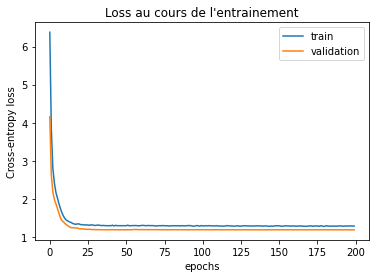

In [ ]:
import matplotlib.pyplot as plt

# Plot validation and training loss
ep = np.arange(0, nb_epoch)
plt.plot(ep, train_loss, '-', label='train')
plt.plot(ep, validation_loss, '-', label='validation')
plt.legend()
plt.title("Loss au cours de l'entrainement")
plt.xlabel("epochs")
plt.ylabel("Cross-entropy loss")
plt.show()

In [ ]:
chosen_example = 100
best_model.eval()
print(f"Test input is:")
src = validation_english_tensors[chosen_example].unsqueeze(0)
print(english_vocab.id_to_word(src.squeeze().tolist()))
src_mask = (src!=0).unsqueeze(-2)
tgt = validation_tokens["sparql"][chosen_example]
print(f"Expected output of length {tgt.size} is:")
print(" ".join(tgt.tolist()))
src = src.requires_grad_(False).clone().detach().to(device=device)
src_mask = src_mask.requires_grad_(False).clone().detach().to(device=device)
output = greedy_decode(best_model, src, src_mask, max_len=50, start_symbol=sparql_vocab.word_to_id("<S>"), end_symbol=sparql_vocab.word_to_id("</S>")).squeeze()
print(f"Actual output of length {output.shape[0]} is: ")
print(output)
print(" ".join(sparql_vocab.id_to_word(output.tolist())))



Test input is:
['<S>', 'what', 'is', 'the', 'dbo:municipality', 'of', 'dbr:Homestead_Grays_Bridge', '?', '</S>']
Expected output of length 11 is:
<S> select distinct ?uri where { dbr:Homestead_Grays_Bridge dbo:municipality ?uri } </S>
Actual output of length 11 is: 
tensor([   1,    2,    3,    6,    8,    9, 2549, 2101,    6,   11,   12],
       device='cuda:0')
<S> select distinct ?uri where { dbr:Homestead_Grays_Bridge dbo:municipality ?uri } </S>


In [ ]:
from torchtext.data.metrics import bleu_score
def compute_bleu(predictions: List[List[str]], targets: List[List[str]]) -> float:
    """
    entrées:
       - predictions: Liste des prédicitons du modèle pour l'ensemble de validation. Chaque prédiction est une liste de jetons textuels.
       - targets: Liste des requêtes attendues de l'ensemble de validation. Chaque requête est une liste de jetons textuels.
    sortie:
       Le score bleu moyen de vos prédictions comparées aux requêtes attendues.
    """
    return bleu_score(predictions, [[tokens] for tokens in targets])

def compute_accuracy(predictions, targets):
    return (sum(np.array(predictions, dtype=object)==np.array(targets, dtype=object)))/len(predictions)

maxlen = max(train_sparql_tensors.apply(len))+10
predictions = []
targets = []
for i in tqdm(range(0, len(validation_english_tensors))):
    src = validation_english_tensors[i].unsqueeze(0)
    src_mask = (src!=0).unsqueeze(-2)
    src = src.requires_grad_(False).clone().detach().to(device)
    src_mask = src_mask.requires_grad_(False).clone().detach().to(device)
    output = greedy_decode(best_model, src, src_mask, max_len=maxlen, start_symbol=sparql_vocab.word_to_id("<S>"), end_symbol=sparql_vocab.word_to_id("</S>")).squeeze()
    predictions.append(sparql_vocab.id_to_word(output.tolist()))
    targets.append(validation_tokens["sparql"][i].tolist())

print("BLEU score", compute_bleu(predictions, targets))
print("Accuracy", compute_accuracy(predictions, targets))

  0%|          | 0/500 [00:00<?, ?it/s]

BLEU score 0.9880239995462768
Accuracy 0.942


In [ ]:
# Soumission Kaggle

predictions = []
for i in tqdm(range(0, len(test_english_tensors))):
  src = test_english_tensors[i].unsqueeze(0)
  src_mask = (src!=padding_id).unsqueeze(-2)
  src = src.requires_grad_(False).clone().detach().to(device)
  src_mask = src_mask.requires_grad_(False).clone().detach().to(device)
  output = greedy_decode(best_model, src, src_mask, max_len=maxlen, start_symbol=sparql_vocab.word_to_id("<S>"), end_symbol=sparql_vocab.word_to_id("</S>")).squeeze()
  predictions.append(" ".join(sparql_vocab.id_to_word(output.tolist()[1:-1])))
submission = test_df.drop('english', axis=1)
submission['translation'] = predictions
submission.to_csv("tp4_submission.csv")

  0%|          | 0/500 [00:00<?, ?it/s]

### 7.4. Conclusion (5%)
En quelques phrases précises, discutez des avantages et limites de vos architectures. Analysez les cas d’erreur. Indiquez des pistes d’amélioration futures potentielles.

Au final, on voit une nette amélioration de l'algorithme lorsque le mécanisme de copie est introduit. Il serait intéressant de comparer ces resultats avec ceux obtenus en utilisant un ensemble d'entraînement plus grand ou un modèle pré-entrainé. Cela montrerait jusqu'à quel point le mécanisme de copie permet de se passer d'un ensemble d'entraînement vaste (contenant la majorité des mots de l'ensemble test). Il serait également intéressant de l'ajouter à un modèle pré-entrainé comme BART ou T5 afin de voir à quel point il peut améliorer les résultats dans ce cas là.

In [ ]:
!jupyter nbconvert --to html "equipe_7_inf8460_TP4 (2).ipynb"

[NbConvertApp] Converting notebook equipe_7_inf8460_TP4 (2).ipynb to html
[NbConvertApp] Writing 728384 bytes to equipe_7_inf8460_TP4 (2).html


## 8. LIVRABLES
Vous devez remettre sur Moodle:

1) Le code : Un Jupyter notebook en Python qui contient le code tel que soumis dans l’environnement Kaggle implanté avec les librairies disponibles pour ce cours (Python, Keras, NLTK, scikitLearn, etc.) ainsi que votre fichier de soumission de données de test. Le code doit être exécutable sans erreur et accompagné des commentaires appropriés dans le notebook de manière à expliquer les différentes fonctions et étapes dans votre projet. Nous nous réservons le droit de demander une démonstration ou la preuve que vous avez effectué vous-mêmes les expériences décrites. *Attention, en aucun cas votre code ne doit avoir été copié de projets potentiellement existants.*

2) Un fichier `requirements.txt` doit indiquer toutes les librairies / données nécessaires. Les critères de qualité tels que la lisibilité du code et des commentaires sont importants.

3) Un lien *GoogleDrive* vers les modèles nécessaires pour exécuter votre notebook si approprié.

4) Le fichier `tp3_submission.csv`.

5) Un document `contributions.txt` : Décrivez brièvement la contribution de chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. En particulier, tous les membres du projet devraient participer à la conception du projet et participer activement à la réflexion et à l’implémentation du code.


__EVALUATION__ <br>
Votre TP sera évalué sur les points suivants :

__Critères :__
1. Implantation correcte et efficace
2. Exécution correcte du code
3. Qualité du code
4. Commentaires clairs et informatifs
5. Aspect novateur : autres métriques ou modèles qui dépassent ce qui est demandé

__CODE D’HONNEUR__
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. L’utilisation de code ne peut concerner que les architectures de base (par exemple le Transformer). Vous __ne pouvez pas__ soumettre un code, écrit par quelqu’un d’autre, faisant de la traduction de la langue naturelle vers SPARQL. Dans le cas contraire, cela sera considéré comme du plagiat.
- __Règle 2__: Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe INF8460, ou incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.